In [1]:
 %matplotlib inline
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

## The Dataset is read from saved pickle object dataframe.pkl
    1. The column CURRENT LOAN DELINQUENCY STATUS is measure of no of days a loan is behind , hence non-performing.
    2. The following exercise plots the values of a feature against the CURRENT LOAN DELINQUENCY STATUS to see the   relationships.

#### Get dataframe for pickle object

In [2]:
dfWithG=pd.read_pickle('data/dataframe.pkl')
dfWithG2=pd.read_pickle('data/dataframe.pkl')

#### Measure data for each year-quarter time period.

In [3]:
dfWithG.groupby(['year','quarter']).size()

year  quarter
2009  1          109857
      2          104205
      3           98607
      4           94714
2010  1           91327
      2           88217
      3           84878
      4           81175
2011  1           77495
      2           74321
      3           71768
      4           69070
2012  1           66132
      2           63265
      3           60494
      4           57710
2013  1           54826
      2           51645
      3           48789
      4           46472
2014  1           44740
dtype: int64

#### Peek into data

In [4]:
dfWithG.head()

,LOAN SEQUENCE NUMBER,MONTHLY REPORTING PERIOD,CURRENT ACTUAL UPB,CURRENT LOAN DELINQUENCY STATUS,REMAINING MONTHS TO LEGAL MATURITY,REPURCHASE FLAG,MODIFICATION FLAG,ZERO BALANCE CODE,CURRENT INTEREST RATE,CURRENT DEFERRED UPB,year,quarter,CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,MORTGAGE INSURANCE PERCENTAGE,CLTV,DTI Ratio,change-current,change-chained
0,F199Q1000002,2009-01-01,99584.031250,0,247,F,N,00,6.3,0.0,2009,1,733,N,000,51.0,0.0,-4.5,-5.4
1,F199Q1000002,2009-02-01,99386.359375,0,246,F,N,00,6.3,0.0,2009,1,733,N,000,51.0,0.0,-4.5,-5.4
2,F199Q1000002,2009-03-01,99187.648438,0,245,F,N,00,6.3,0.0,2009,1,733,N,000,51.0,0.0,-4.5,-5.4
3,F199Q1000016,2009-01-01,192371.562500,0,242,F,N,00,6.0,0.0,2009,1,738,N,000,73.0,44.0,-4.5,-5.4
4,F199Q1000016,2009-02-01,191958.671875,0,241,F,N,00,6.0,0.0,2009,1,738,N,000,73.0,44.0,-4.5,-5.4


### Get data for a given year quarter 

In [5]:
dfWithG=dfWithG[(dfWithG['year']==2013) & (dfWithG['quarter']==4)]


#### CREDIT SCORE vs Loan Performance (current or late) relationship

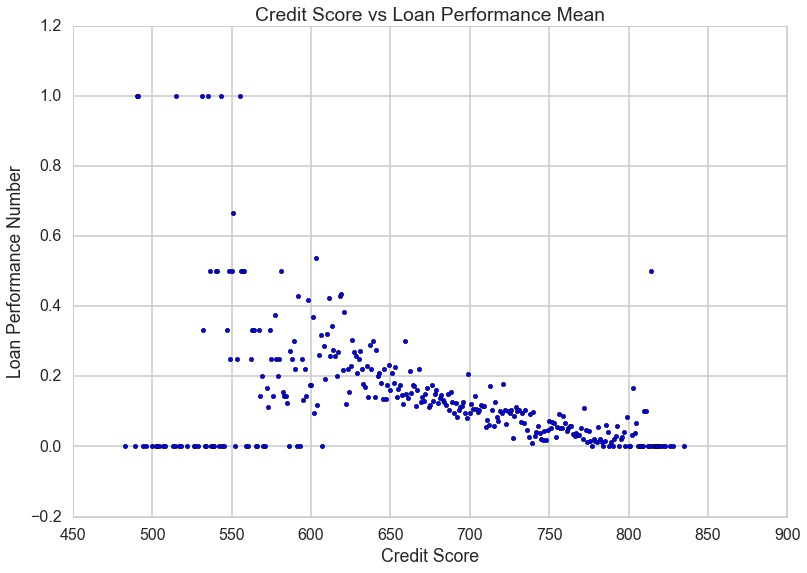

In [6]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CREDIT SCORE','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df2['PERFORMING']=[0 if x==0 else 1 for x in df2['CURRENT LOAN DELINQUENCY STATUS']]
df3=df2.reset_index()
df3=df3[['CREDIT SCORE','PERFORMING']]
#df3=df3.sample(frac=.50)
df3=df3.groupby('CREDIT SCORE').mean()
df3=df3.reset_index()

plt.scatter(df3['CREDIT SCORE'],df3['PERFORMING'])
plt.xlabel('Credit Score')
plt.ylabel('Loan Performance Number')
plt.title('Credit Score vs Loan Performance Mean')
plt.xlim(400,850)
plt.autoscale()

#### Combined Loan to Value Ratio and LOAN DELINQUENCY STATUS relationship

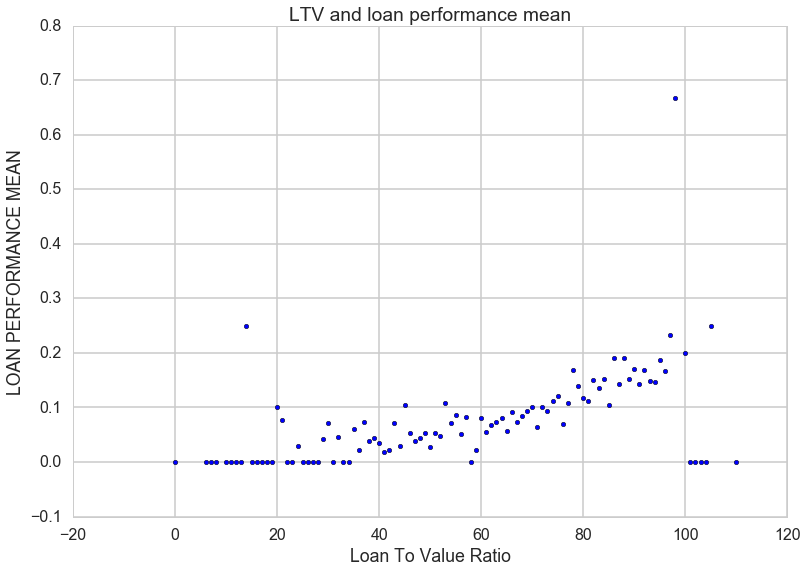

In [7]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','CLTV','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df2['PERFORMING']=[0 if x==0 else 1 for x in df2['CURRENT LOAN DELINQUENCY STATUS']]
df3=df2.reset_index()
df3=df3[['CLTV','PERFORMING']]
df3=df3.groupby('CLTV').mean()
df3=df3.reset_index()
plt.scatter(df3['CLTV'],df3['PERFORMING'])
plt.xlabel('Loan To Value Ratio')
plt.ylabel('LOAN PERFORMANCE MEAN')
plt.title('LTV and loan performance mean')

plt.autoscale()


#### Interest Rate and LOAN DELINQUENCY STATUS relationship

<Container object of 100 artists>

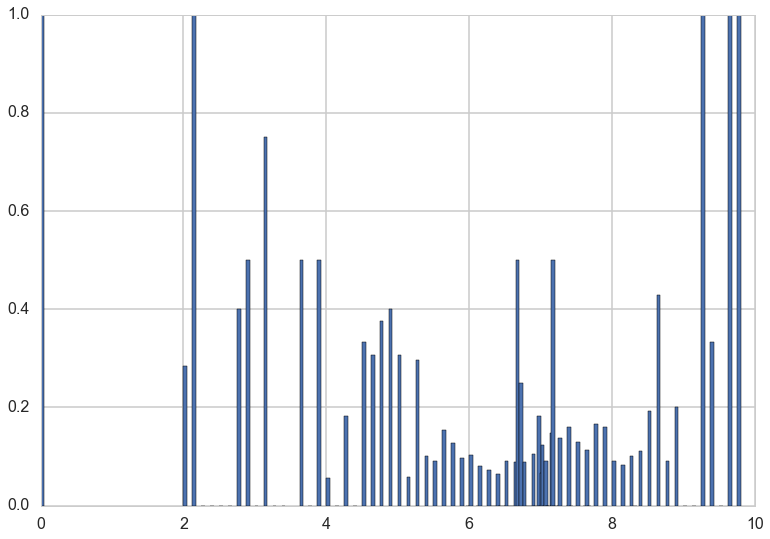

In [12]:
import seaborn as sns
df1=dfWithG[['LOAN SEQUENCE NUMBER','CURRENT INTEREST RATE','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df2['PERFORMING']=[0 if x==0 else 1 for x in df2['CURRENT LOAN DELINQUENCY STATUS']]
df3=df2.reset_index()
df3=df3[['CURRENT INTEREST RATE','PERFORMING']]
df4=df3.groupby('CURRENT INTEREST RATE',sort=True).mean()
df4=df4.reset_index()
#df4=df4[(df4['CURRENT INTEREST RATE']>6 )& (df4['CURRENT INTEREST RATE']<8)]
#df4
#ax = sns.barplot(x="CURRENT INTEREST RATE", y="PERFORMING", data=df4)

plt.bar(df4['CURRENT INTEREST RATE'],df4['PERFORMING'],width=0.050)
#plt.xlabel('CURRENT INTEREST RATE')
#plt.ylabel('LOAN PERFORMANCE')
#plt.title('Interest Rate and loan performance')
#plt.xlim(400,850)
#plt.autoscale()

#### Debt to Income Ratio and LOAN DELINQUENCY STATUS relationship

<Container object of 66 artists>

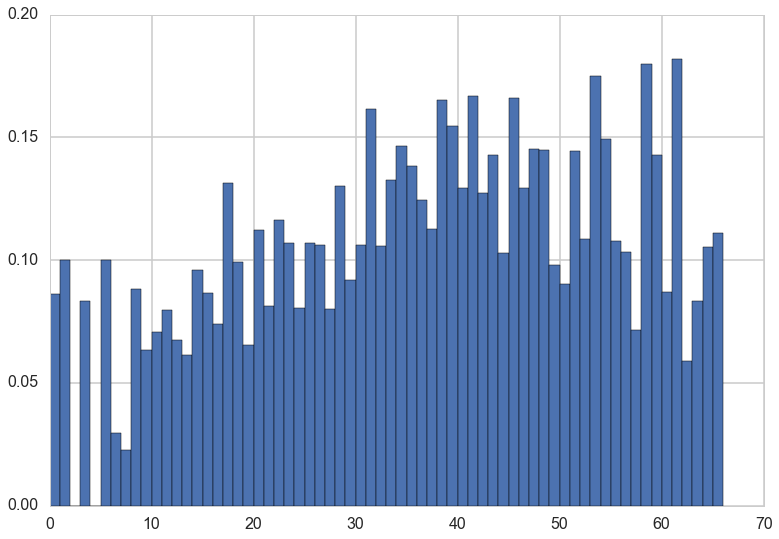

In [9]:

df1=dfWithG[['LOAN SEQUENCE NUMBER','DTI Ratio','CURRENT LOAN DELINQUENCY STATUS']]
df2=df1.groupby('LOAN SEQUENCE NUMBER').max()
df2['PERFORMING']=[0 if x==0 else 1 for x in df2['CURRENT LOAN DELINQUENCY STATUS']]
df3=df2.reset_index()
df3=df3[['DTI Ratio','PERFORMING']]
df4=df3.groupby('DTI Ratio',sort=True).mean()
df4=df4.reset_index()
plt.bar(df4['DTI Ratio'],df4['PERFORMING'],width=1.00)
#plt.xlabel('CURRENT INTEREST RATE')

#### Repurchase Flag and LOAN DELINQUENCY STATUS relationship

(-5, 150)

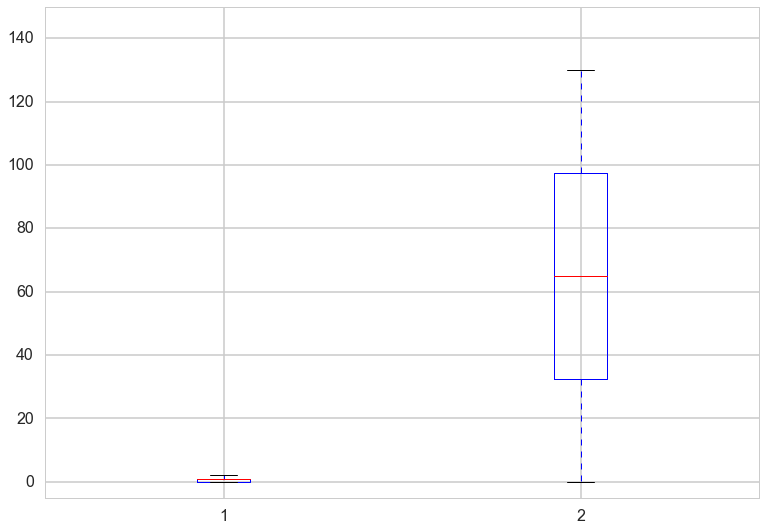

In [10]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','REPURCHASE FLAG','CURRENT LOAN DELINQUENCY STATUS']]
#df1=df1[df1['MODIFICATION FLAG']=='N']
df2=df1.groupby('LOAN SEQUENCE NUMBER').max().reset_index()
df3=df2[['REPURCHASE FLAG','CURRENT LOAN DELINQUENCY STATUS']]
df3['REPURCHASED']=[0 if x=='Y' else 1 for x in df3['REPURCHASE FLAG']]
df4=df3[['REPURCHASED','CURRENT LOAN DELINQUENCY STATUS']]
dfN=df4[df4['REPURCHASED']==1]
dfY=df4[df4['REPURCHASED']==0]
data=[dfN,dfY]
plt.boxplot(data)
plt.ylim(-5,150)

#plt.autoscale()

#### Mondification Flag and LOAN DELINQUENCY STATUS relationship

(-5, 50)

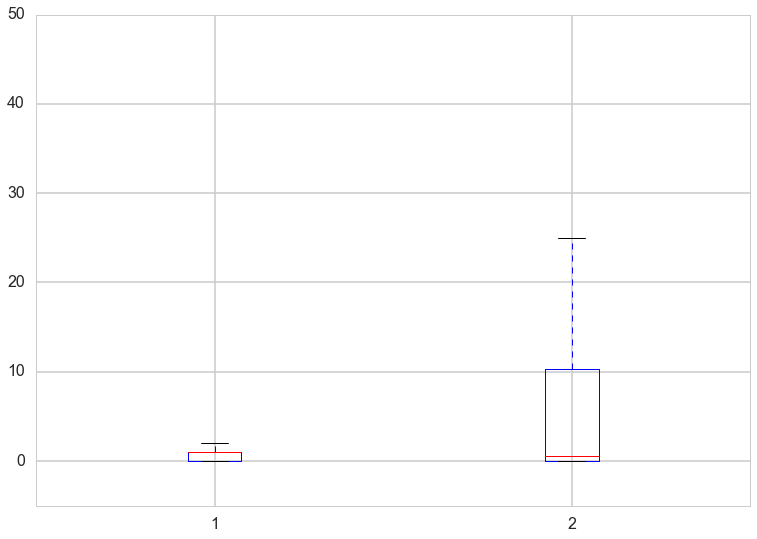

In [11]:
df1=dfWithG[['LOAN SEQUENCE NUMBER','MODIFICATION FLAG','CURRENT LOAN DELINQUENCY STATUS']]
#df1=df1[df1['MODIFICATION FLAG']=='N']
df2=df1.groupby('LOAN SEQUENCE NUMBER').max().reset_index()
df3=df2[['MODIFICATION FLAG','CURRENT LOAN DELINQUENCY STATUS']]
df3['MODIFIED']=[0 if x=='Y' else 1 for x in df3['MODIFICATION FLAG']]
df4=df3[['MODIFIED','CURRENT LOAN DELINQUENCY STATUS']]
dfN=df4[df4['MODIFIED']==1]
dfY=df4[df4['MODIFIED']==0]
labels=('A','B')
data=[dfN,dfY]
plt.boxplot(data)
plt.ylim(-5,50)

#plt.autoscale()